In [1]:
import pybaseball
import pandas as pd
import numpy as np
import bs4
import requests
import matplotlib.pyplot as plt
import unicodedata
import seaborn as sns
import math
import matplotlib.patches as mpatches
from IPython.display import display
pybaseball.cache.enable()

import os
pd.set_option('display.max_columns',None)
os.getcwd()
os.chdir('C:\\Users\\npacchioli\\Desktop\\pyBaseball\\')
os.getcwd()

directory = 'C:\\Users\\npacchioli\\Desktop\\pyBaseball\\2023\\'

from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import statcast_batter
from pybaseball import statcast
from pybaseball import pitching_stats

In [2]:
#create table to convert months to ranges for bucketing purposes
monthTable22 = pd.DataFrame({'Month': ['2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10'],
                           'Abbrev': ['Apr','May','Jun','Jul','Aug','Sep','Oct'],
                          'Months': ['Apr-Jun','Apr-Jun','Apr-Jun','Jul-Oct','Jul-Oct','Jul-Oct','Jul-Oct']})

monthTable22

monthTable23 = pd.DataFrame({'Month': ['2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09', '2023-10'],
                           'Abbrev': ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'],
                          'Months': ['Mar-Jun','Mar-Jun','Mar-Jun','Mar-Jun','Jul-Oct','Jul-Oct','Jul-Oct','Jul-Oct']})

monthTable23

monthTableTot = pd.concat([monthTable22,monthTable23], axis = 0)
monthTableTot

,Month,Abbrev,Months
0,2022-04,Apr,Apr-Jun
1,2022-05,May,Apr-Jun
2,2022-06,Jun,Apr-Jun
3,2022-07,Jul,Jul-Oct
4,2022-08,Aug,Jul-Oct
5,2022-09,Sep,Jul-Oct
6,2022-10,Oct,Jul-Oct
0,2023-03,Mar,Mar-Jun
1,2023-04,Apr,Mar-Jun
2,2023-05,May,Mar-Jun


In [3]:
#get raw data for all pitchers

raw = statcast(start_dt = '2023-03-30', end_dt = '2023-07-09')
#raw = statcast(start_dt = '2022-09-01',end_dt = '2022-10-03')

This is a large query, it may take a moment to complete


100%|██████████| 102/102 [00:15<00:00,  6.54it/s]


In [4]:
raw22 = statcast(start_dt = '2022-09-01', end_dt = '2022-10-03')

This is a large query, it may take a moment to complete


100%|██████████| 33/33 [00:01<00:00, 21.11it/s]


In [5]:
#add the playerID Map
playerID = pd.read_excel('playerMapSavant.xlsx')

In [16]:
raw22

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,Month,Abbrev,Months,Hitter Name
0,FF,2022-09-01,94.1,-1.74,5.53,"Kelly, Merrill",592885,518876,None,ball,<NA>,<NA>,<NA>,<NA>,14,"Christian Yelich grounds out sharply, second b...",R,L,R,AZ,MIL,B,<NA>,None,0,0,2022,-0.78,1.34,0.15,1.3,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,608348,<NA>,<NA>,6.622491,-136.618903,-8.152839,-11.278228,31.904726,-13.730214,3.29,1.72,<NA>,<NA>,<NA>,93.5,2492,6.2,663290,518876,608348,572233,606466,668942,672695,682998,677950,662139,54.31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Strategic,Standard,229,0.0,0.033,2022-09,Sep,Jul-Oct,Christian Yelich
1,FF,2022-09-01,87.3,1.47,5.93,"Hill, Rich",543760,448179,None,called_strike,<NA>,<NA>,<NA>,<NA>,2,Marcus Semien flies out to center fielder Rob ...,R,R,L,BOS,TEX,S,<NA>,None,0,0,2022,0.77,1.59,-0.2,3.48,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,608700,<NA>,<NA>,-5.596142,-127.158968,-3.092471,9.481499,24.087667,-14.367239,3.51,1.62,<NA>,<NA>,<NA>,87.4,2172,6.1,663210,448179,608700,614173,624414,646240,593428,502054,608701,657077,54.37,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,147,0.0,-0.034,2022-09,Sep,Jul-Oct,Marcus Semien
2,FF,2022-09-01,90.2,-1.39,5.61,"Bieber, Shane",656775,669456,home_run,hit_into_play,<NA>,<NA>,<NA>,<NA>,6,Cedric Mullins homers (12) on a fly ball to ri...,R,L,R,CLE,BAL,X,<NA>,fly_ball,0,0,2022,-0.89,1.52,0.58,2.33,<NA>,<NA>,<NA>,0,1,Top,232.1,87.97,<NA>,<NA>,595978,<NA>,<NA>,6.841436,-131.251506,-5.534443,-11.672818,24.955083,-13.546911,3.37,1.58,377,96.7,32,91.2,2243,6.7,662971,669456,595978,647304,665926,608070,642708,680757,664702,660757,53.8,0.223,0.413,2.0,1,0,3,5,1,1,4-Seam Fastball,0,0,0,0,1,0,1,0,Standard,Standard,212,-0.101,1.0,2022-09,Sep,Jul-Oct,Cedric Mullins
3,FF,2022-09-01,91.7,1.83,5.8,"Rodriguez, Eduardo",677594,593958,None,called_strike,<NA>,<NA>,<NA>,<NA>,5,Julio Rodriguez walks.,R,R,L,DET,SEA,S,<NA>,None,0,0,2022,0.48,1.34,0.06,2.51,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,571466,<NA>,<NA>,-5.506725,-133.483714,-5.349505,6.904116,27.85164,-15.213927,3.26,1.48,<NA>,<NA>,<NA>,91.7,2125,6.2,662785,593958,571466,605612,650489,600869,595879,668731,682985,622682,54.31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,147,0.0,-0.034,2022-09,Sep,Jul-Oct,Julio Rodriguez
4,FF,2022-09-01,87.3,-1.95,5.99,"Espino, Paolo",643393,502179,None,ball,<NA>,<NA>,<NA>,<NA>,13,"Tony Kemp grounds out, second baseman Luis Gar...",R,L,R,WSH,OAK,B,<NA>,None,0,0,2022,-0.7,1.75,-1.66,1.91,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,656180,<NA>,<NA>,2.145313,-126.926675,-7.209014,-8.046069,28.020065,-11.972149,3.0,1.39,<NA>,<NA>,<NA>,86.8,2188,6.2,662491,502179,656180,572228,671277,514917,545121,669743,657041,608841,54.3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Infield shift,Standard,209,0.0,0.033,2022-09,Sep,Jul-Oct,Tony Kemp
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [6]:
def sort_proc(df):
    df = df.sort_values(by = ['game_date','inning','at_bat_number','pitch_number'], ascending = [True,True,True,True])
    df['game_date'] = df['game_date'].astype('|S80')
    df['Month'] = df['game_date'].str[:7]
    df = pd.merge(df,monthTableTot, how='left', on='Month')
    df = pd.merge(df, playerID, how = 'left', on = 'batter')
    return df

raw = sort_proc(raw)
raw22 = sort_proc(raw22)

In [7]:
#create swingStrike and oswing charts

def zone_process(df):
    df = df[df['zone'].notna()]
    return df

raw = zone_process(raw)
raw22 = zone_process(raw22)

t = []

for i in raw['description']:
    if i == 'swinging_strike' or i == 'swinging_strike_blocked' or i == 'foul_tip':
        j = 1
    else:
        j = 0
        
    t.append(j)
    
#create the pivot wiht swinging strikes
raw['swstr'] = t

#let's get swing

q = []

for i in raw['description']:
    if i == 'foul' or i =='foul_tip' or i == 'foul bunt' or i == 'bunt_foul_tip' or i == 'foul_tip' or i == 'hit_into_play' or i == 'missed_bunt' or i == 'swinging_strike' or i == ' swinging_strike_blocked':
        j = 1
    else:
        j = 0
    
    q.append(j)
    
#let's get location
# if balls it marks as a 1



z = []

for i in raw['zone']:
    if i > 10:
        j=1
    else:
        j=0
        
    z.append(j)
     
    
#create balls
raw['ball'] = z

#create swing
raw['swing'] = q

#create chase
raw['chase'] = np.where(raw['swing'] + raw['ball'] == 2, 1,0)

#create swingStrike and oswing charts

t = []

for i in raw22['description']:
    if i == 'swinging_strike' or i == 'swinging_strike_blocked' or i == 'foul_tip':
        j = 1
    else:
        j = 0
        
    t.append(j)
    
#create the pivot wiht swinging strikes
#2022 data


raw22['swstr'] = t

#let's get swing

q = []

for i in raw22['description']:
    if i == 'foul' or i =='foul_tip' or i == 'foul bunt' or i == 'bunt_foul_tip' or i == 'foul_tip' or i == 'hit_into_play' or i == 'missed_bunt' or i == 'swinging_strike' or i == ' swinging_strike_blocked':
        j = 1
    else:
        j = 0
    
    q.append(j)
    
#let's get location
#if balls it marks as a 1



z = []

for i in raw22['zone']:
    if i > 10:
        j=1
    else:
        j=0
        
    z.append(j)
     
    
#create balls
raw22['ball'] = z

#create swing
raw22['swing'] = q

#create chase
raw22['chase'] = np.where(raw22['swing'] + raw22['ball'] == 2, 1,0)

In [8]:
#raw = raw[raw['release_spin_rate'].notna()]
#raw = raw[raw['spin_axis'].notna()]
raw = raw[raw['release_speed'].notna()]
raw = raw[raw['pfx_x'].notna()]
raw = raw[raw['pfx_z'].notna()]
raw = raw[raw['ax'].notna()]
raw = raw[raw['ay'].notna()]
raw = raw[raw['az'].notna()]
raw = raw[raw['vx0'].notna()]
raw = raw[raw['vy0'].notna()]
raw = raw[raw['vz0'].notna()]
raw = raw[raw['release_extension'].notna()]

raw22 = raw22[raw22['release_spin_rate'].notna()]
raw22 = raw22[raw22['spin_axis'].notna()]
raw22 = raw22[raw22['release_speed'].notna()]
raw22 = raw22[raw22['pfx_x'].notna()]
raw22 = raw22[raw22['pfx_z'].notna()]
raw22 = raw22[raw22['ax'].notna()]
raw22 = raw22[raw22['ay'].notna()]
raw22 = raw22[raw22['az'].notna()]
raw22 = raw22[raw22['vx0'].notna()]
raw22 = raw22[raw22['vy0'].notna()]
raw22 = raw22[raw22['vz0'].notna()]
raw22 = raw22[raw22['release_extension'].notna()]

In [9]:
#get chase rate dataframe
rawBall = raw.loc[raw['ball'] == 1]

#get balls in play data frame
rawBIP = raw.loc[raw['description'] == 'hit_into_play']
rawBIP = rawBIP[rawBIP['launch_speed_angle'].notna()]
rawBIP = rawBIP[rawBIP['launch_speed'].notna()]
rawBIP[['launch_speed','launch_angle']] = rawBIP[['launch_speed','launch_angle']].astype('int64')

# get barrels

b = []

for i in rawBIP['launch_speed_angle']:
    if i == 6:
        j = 1
    else:
        j = 0
        
    b.append(j)
    
    
rawBIP['barrel'] = b

c = []

for i in rawBIP['launch_speed']:
    if i > 94.9:
        j = 1
    else:
        j = 0
        
    c.append(j)
    
rawBIP['hard_hit'] = c



#get chase rate dataframe
raw22Ball = raw22.loc[raw22['ball'] == 1]

#get balls in play data frame
raw22BIP = raw22.loc[raw22['description'] == 'hit_into_play']
raw22BIP = raw22BIP[raw22BIP['launch_speed_angle'].notna()]
raw22BIP = raw22BIP[raw22BIP['launch_speed'].notna()]
raw22BIP[['launch_speed','launch_angle']] = raw22BIP[['launch_speed','launch_angle']].astype('int64')

# get barrels

b = []

for i in raw22BIP['launch_speed_angle']:
    if i == 6:
        j = 1
    else:
        j = 0
        
    b.append(j)
    
    
raw22BIP['barrel'] = b

c = []

for i in raw22BIP['launch_speed']:
    if i > 94.9:
        j = 1
    else:
        j = 0
        
    c.append(j)
    
raw22BIP['hard_hit'] = c

In [30]:
raw22

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,Month,Abbrev,Months,Hitter Name,ball,swing,chase,pitches_seen,swstr
0,FF,2022-04-07,93.0,3.01,5.62,"Bumgarner, Madison",543592,518516,None,ball,<NA>,<NA>,<NA>,<NA>,13,Austin Nola flies out to right fielder Pavin S...,R,R,L,AZ,SD,B,<NA>,None,0,0,2022,0.74,1.47,-1.4,1.96,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,608348,<NA>,<NA>,-12.970345,-134.580064,-6.756649,11.956605,31.798681,-12.934539,3.37,1.62,<NA>,<NA>,<NA>,93.1,2172,6.8,663418,518516,608348,572233,606466,656403,672695,444482,662139,656976,53.67,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,141,0.0,0.033,2022-04,Apr,Apr-Jun,Austin Nola,1,0,0,1502.0,0
1,FF,2022-04-07,86.6,-2.23,6.13,"Hendricks, Kyle",543939,543294,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,4,Kolten Wong pops out to third baseman Patrick ...,R,L,R,CHC,MIL,X,5,popup,0,0,2022,-0.61,1.68,-0.37,2.22,<NA>,<NA>,<NA>,0,1,Top,116.33,153.47,<NA>,<NA>,575929,<NA>,<NA>,5.617442,-125.856168,-6.42443,-7.696716,28.679242,-13.23105,3.18,1.47,122,86.7,72,85.4,1926,5.8,663178,543294,575929,643524,663611,621550,663538,664023,518792,673548,54.66,0.003,0.003,0.0,1,0,0,3,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Infield shift,Standard,211,0.022,-0.221,2022-04,Apr,Apr-Jun,Kolten Wong,0,1,0,2029.0,0
2,FF,2022-04-07,89.9,-1.31,6.18,"Greinke, Zack",664702,425844,None,foul,<NA>,<NA>,<NA>,<NA>,5,Myles Straw singles on a ground ball to right ...,R,R,R,KC,CLE,S,<NA>,None,0,0,2022,-0.44,1.18,-0.08,2.56,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,521692,<NA>,<NA>,3.963965,-130.795149,-5.468157,-5.919045,27.110972,-17.652717,3.3,1.5,164,78.2,65,89.4,2145,5.9,662766,425844,521692,467793,670032,677951,609275,643217,572191,593160,54.57,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,212,0.0,-0.034,2022-04,Apr,Apr-Jun,Myles Straw,0,1,0,2326.0,0
3,SI,2022-04-07,91.7,2.12,6.44,"Corbin, Patrick",516782,571578,None,called_strike,<NA>,<NA>,<NA>,<NA>,8,Starling Marte singles on a soft line drive to...,R,R,L,WSH,NYM,S,<NA>,None,0,0,2022,1.16,1.25,-0.02,1.63,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,660688,<NA>,<NA>,-7.967493,-133.046151,-8.987455,15.537407,30.338976,-15.552218,3.39,1.55,<NA>,<NA>,<NA>,92.0,2023,6.8,662571,571578,660688,605137,514917,596748,444876,657041,645302,665742,53.74,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,Sinker,0,0,0,0,0,0,0,0,Standard,Standard,147,0.0,-0.034,2022-04,Apr,Apr-Jun,Starling Marte,0,0,0,1917.0,0
4,SI,2022-04-07,89.0,-1.18,6.26,"Wainwright, Adam",596129,425794,None,ball,<NA>,<NA>,<NA>,<NA>,11,"Daniel Vogelbach grounds out, shortstop Paul D...",R,L,R,STL,PIT,B,<NA>,None,0,0,2022,-1.09,1.28,-0.92,2.4,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,425877,<NA>,<NA>,2.944736,-129.54284,-6.116895,-12.878118,28.035479,-16.737022,3.17,1.53,<NA>,<NA>,<NA>,89.4,2022,6.6,662021,425794,425877,502671,669242,571448,657557,641933,664056,666185,53.89,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,Sinker,0,0,0,0,0,0,0,0,Strategic,Standard,208,0.0

In [10]:
choose_player = 'Jorge Mateo'

In [11]:
#swing DF
swing_df = raw.loc[raw['Hitter Name'] == choose_player]
swing_df['pitchNumber'] = range(len(swing_df))
swing_df['rolling_swing_rate'] = swing_df['swing'].rolling(100).mean()

swing_df22 = raw22.loc[raw22['Hitter Name'] == choose_player]
swing_df22['pitchNumber'] = range(len(swing_df22))
swing_df22['rolling_swing_rate'] = swing_df22['swing'].rolling(100).mean()

#swstr DF
swstr_df = raw.loc[raw['Hitter Name'] == choose_player]
swstr_df['pitchNumber'] = range(len(swstr_df))
swstr_df['rolling_swstr'] = swstr_df['swstr'].rolling(100).mean()

swstr_df22 = raw22.loc[raw22['Hitter Name'] == choose_player]
swstr_df22['pitchNumber'] = range(len(swstr_df22))
swstr_df22['rolling_swstr'] = swstr_df22['swstr'].rolling(100).mean()

#chase rate DF
chase_df = rawBall.loc[rawBall['Hitter Name'] == choose_player]
chase_df['pitchNumber'] = range(len(chase_df))
chase_df['rolling_chase'] = chase_df['chase'].rolling(100).mean()

chase_df22 = raw22Ball.loc[raw22Ball['Hitter Name'] == choose_player]
chase_df22['pitchNumber'] = range(len(chase_df22))
chase_df22['rolling_swstr'] = chase_df22['chase'].rolling(220).mean()

#barrel rate DF
barrel_df = rawBIP.loc[rawBIP['Hitter Name'] == choose_player]
barrel_df['pitchNumber'] = range(len(barrel_df))
barrel_df['barrel_rate'] = barrel_df['barrel'].rolling(50).mean()

barrel_df22 = raw22BIP.loc[raw22BIP['Hitter Name'] == choose_player]
barrel_df22['pitchNumber'] = range(len(barrel_df22))
barrel_df22['barrel_rate'] = barrel_df22['barrel'].rolling(50).mean()

#hard hit rate DF
hard_df = rawBIP.loc[rawBIP['Hitter Name'] == choose_player]
hard_df['pitchNumber'] = range(len(hard_df))
hard_df['hardhit_rolling'] = barrel_df['hard_hit'].rolling(50).mean()

hard_df22 = raw22BIP.loc[raw22BIP['Hitter Name'] == choose_player]
hard_df22['pitchNumber'] = range(len(hard_df22))
hard_df22['hardhit_rolling'] = barrel_df['hard_hit'].rolling(50).mean()

C:\Users\npacchioli\AppData\Local\Temp\ipykernel_16232\2421668019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_df['pitchNumber'] = range(len(swing_df))
C:\Users\npacchioli\AppData\Local\Temp\ipykernel_16232\2421668019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_df['rolling_swing_rate'] = swing_df['swing'].rolling(100).mean()
C:\Users\npacchioli\AppData\Local\Temp\ipykernel_16232\2421668019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

Text(200, 0.475, 'League Average: 46.9%')

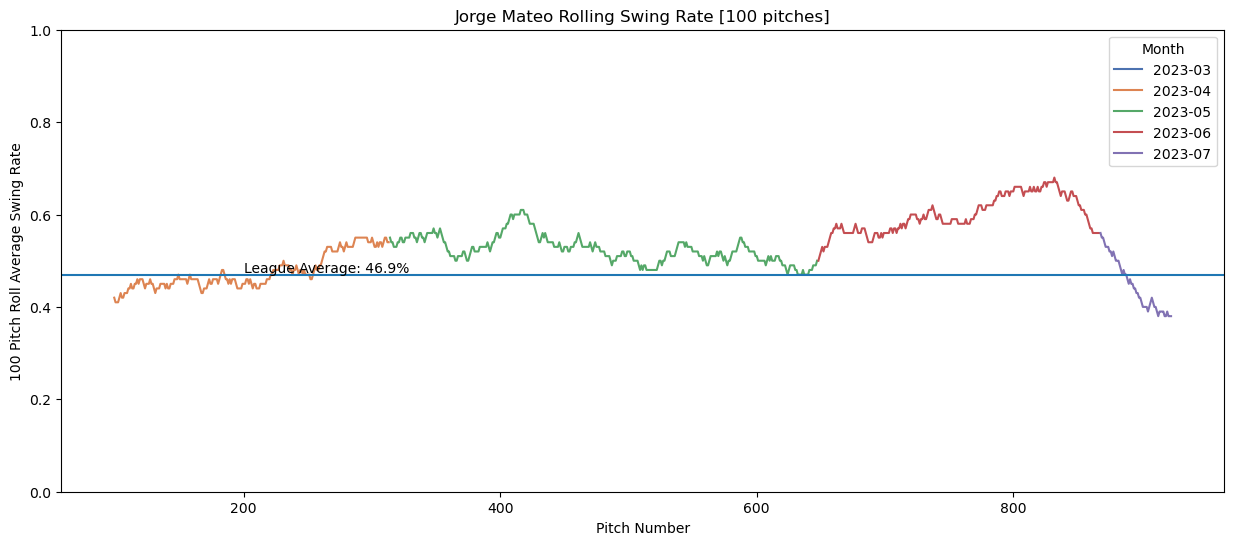

In [12]:
plt.figure(figsize = (15,6))


sns.lineplot(data = swing_df, x = 'pitchNumber', y = 'rolling_swing_rate', hue = 'Month', palette = 'deep').set(ylim=(0,1))
plt.xlabel('Pitch Number')
plt.ylabel('100 Pitch Roll Average Swing Rate')
plt.title(choose_player + ' Rolling Swing Rate [100 pitches]')
plt.axhline(.469)
plt.text(200,.475,"League Average: 46.9%")

Text(100, 0.155, 'League Average: 12.2%')

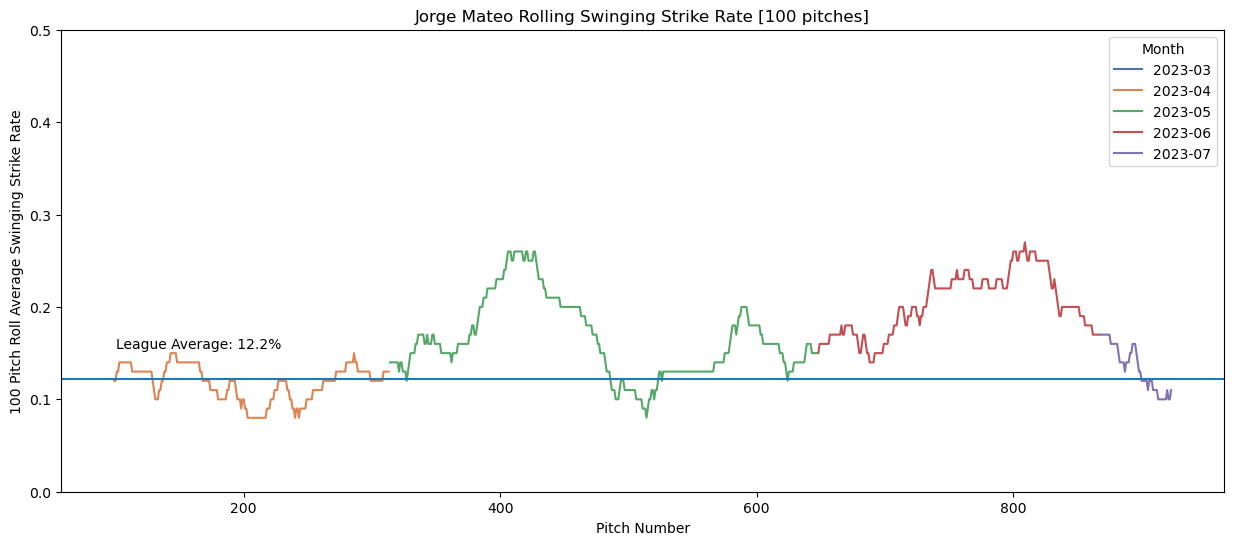

In [13]:
plt.figure(figsize = (15,6))


sns.lineplot(data = swstr_df, x = 'pitchNumber', y = 'rolling_swstr', hue = 'Month', palette = 'deep').set(ylim=(0,.50))
plt.xlabel('Pitch Number')
plt.ylabel('100 Pitch Roll Average Swinging Strike Rate')
plt.title(choose_player + ' Rolling Swinging Strike Rate [100 pitches]')
plt.axhline(.122)
plt.text(100,.155,"League Average: 12.2%")

Text(150, 0.255, 'League Average: 27.8%')

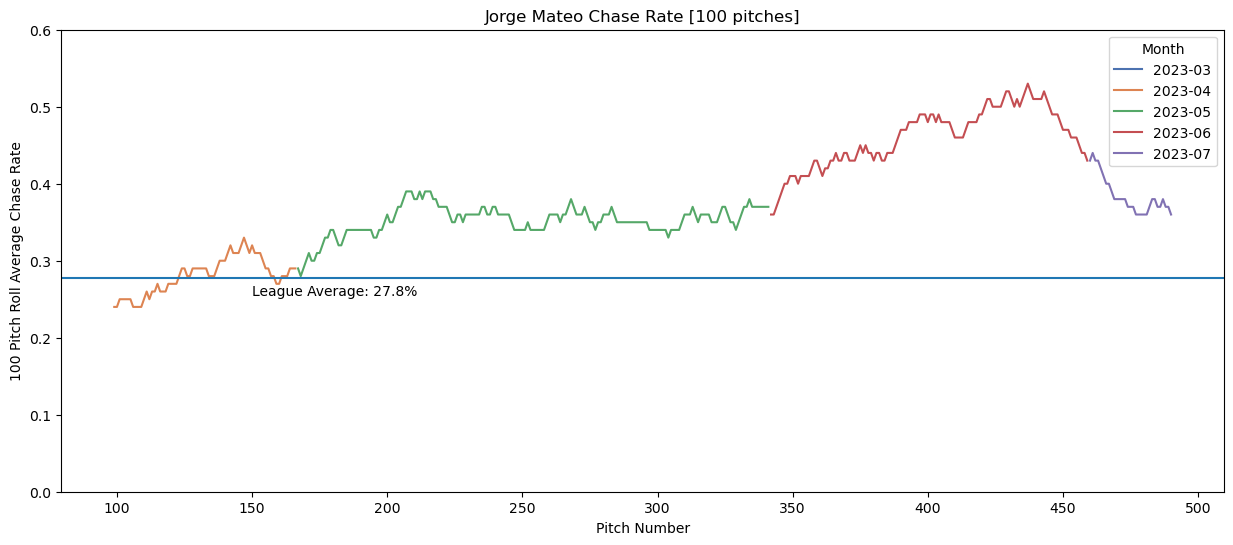

In [14]:
plt.figure(figsize = (15,6))

sns.lineplot(data = chase_df, x = 'pitchNumber', y = 'rolling_chase', hue = 'Month', palette = 'deep').set(ylim=(0,.60))
plt.xlabel('Pitch Number')
plt.ylabel('100 Pitch Roll Average Chase Rate')
plt.title(choose_player + ' Chase Rate [100 pitches]')
plt.axhline(.278)
plt.text(150,.255,"League Average: 27.8%")

Text(50, 0.06, 'League Average: 7.5%')

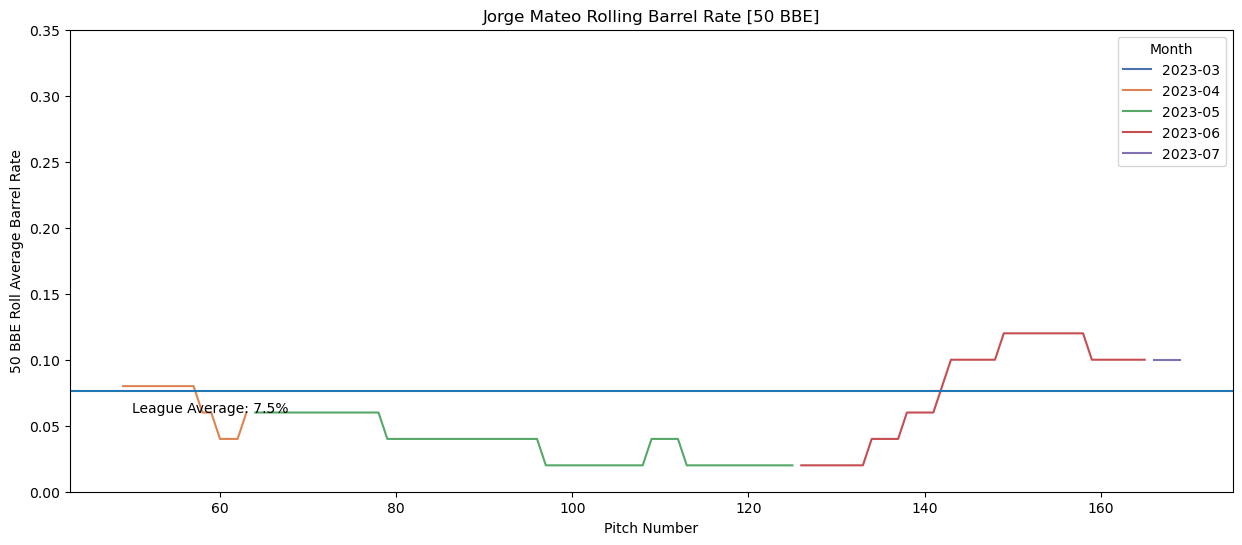

In [15]:
plt.figure(figsize = (15,6))

sns.lineplot(data = barrel_df, x = 'pitchNumber', y = 'barrel_rate', hue = 'Month', palette = 'deep').set(ylim=(0,.35))
plt.xlabel('Pitch Number')
plt.ylabel('50 BBE Roll Average Barrel Rate')
plt.title(choose_player + ' Rolling Barrel Rate [50 BBE]')
plt.axhline(.076)
plt.text(50,.06,"League Average: 7.5%")

Text(50, 0.4, 'League Average: 38.6%')

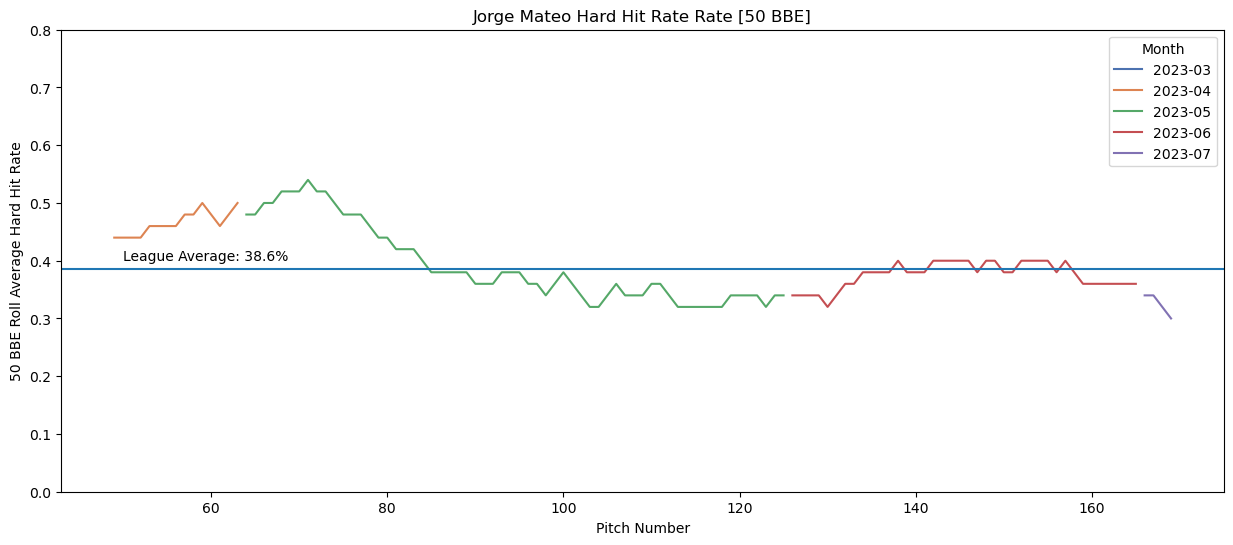

In [16]:
plt.figure(figsize = (15,6))

sns.lineplot(data = hard_df, x = 'pitchNumber', y = 'hardhit_rolling', hue = 'Month', palette = 'deep').set(ylim=(0,.80))
plt.xlabel('Pitch Number')
plt.ylabel('50 BBE Roll Average Hard Hit Rate')
plt.title(choose_player + ' Hard Hit Rate Rate [50 BBE]')
plt.axhline(.386)
plt.text(50,.40,"League Average: 38.6%")

In [17]:
#pivots for master table

#pitches seen
raw['pitches_seen'] = raw.groupby('Hitter Name')['Hitter Name'].transform('size')
pitches_seen = raw.groupby(by='Hitter Name').count()
pitches_seen = pitches_seen.reset_index()
pitches_seen = pitches_seen[['Hitter Name','pitch_type']]
pitches_seen

#BBE
bbe = pd.pivot_table(rawBIP,index = 'Hitter Name', values = 'description',aggfunc = 'count')
bbe = bbe.reset_index()

#chase
chasepiv = pd.pivot_table(rawBall,index ='Hitter Name', values = 'chase')
chasepiv = chasepiv.reset_index()
chasepiv

#barrel
barrelpiv = pd.pivot_table(rawBIP,index ='Hitter Name', values = ('barrel','launch_speed','launch_angle','hard_hit'))
barrelpiv = barrelpiv.reset_index()
barrelpiv

#swinging strike leaderboard
leaderboard = pd.pivot_table(raw,index = 'Hitter Name',values = ('swstr'))
leaderboard = leaderboard.reset_index()
leaderboard = pd.merge(leaderboard, pitches_seen, on = 'Hitter Name', how = 'left')
leaderboard = pd.merge(leaderboard, bbe, on = 'Hitter Name', how = 'left')

#get 90th percentile EV
def ev_90th(g):
    return np.percentile(g,90)

ev90 = pd.pivot_table(rawBIP,index='Hitter Name',values = 'launch_speed',aggfunc = [ev_90th])
ev90 = ev90.reset_index()

#add chases
leaderboard = pd.merge(leaderboard, chasepiv, on = 'Hitter Name', how = 'left')
leaderboard = leaderboard.reset_index()
leaderboard = leaderboard.sort_values(by='chase',ascending = True)
leaderboard = leaderboard.drop(['index'], axis = 1)

#add barrels and hit damage
leaderboard = pd.merge(leaderboard, barrelpiv, on = 'Hitter Name', how = 'left')
leaderboard = leaderboard.reset_index()
leaderboard = leaderboard.drop(['index'], axis = 1)

#add EV90
leaderboard = pd.merge(leaderboard,ev90, on = 'Hitter Name', how = 'left')

#filter by pitches seen
pseen = 1
leaderboard = leaderboard.loc[leaderboard['pitch_type'] > pseen]

#try rename
#try rename
leaderboard = leaderboard.rename(columns = {'pitch_type':'pitches_seen', 'description': 'BBE'})
leaderboard = leaderboard.rename(columns={leaderboard.columns[9]: '90th_ev'})

#sort
leaderboard = leaderboard.sort_values(by='barrel',ascending = False)

C:\Users\npacchioli\AppData\Local\Temp\ipykernel_16232\269036185.py:49: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  leaderboard = pd.merge(leaderboard,ev90, on = 'Hitter Name', how = 'left')
C:\Users\npacchioli\AppData\Local\Temp\ipykernel_16232\269036185.py:49: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  leaderboard = pd.merge(leaderboard,ev90, on = 'Hitter Name', how = 'left')


In [18]:
#pivots for master table

#pitches seen
raw22['pitches_seen'] = raw22.groupby('Hitter Name')['Hitter Name'].transform('size')
pitches_seen = raw22.groupby(by='Hitter Name').count()
pitches_seen = pitches_seen.reset_index()
pitches_seen = pitches_seen[['Hitter Name','pitch_type']]
pitches_seen

#BBE
bbe = pd.pivot_table(raw22BIP,index = 'Hitter Name', values = 'description',aggfunc = 'count')
bbe = bbe.reset_index()

#chase
chasepiv = pd.pivot_table(raw22Ball,index ='Hitter Name', values = 'chase')
chasepiv = chasepiv.reset_index()
chasepiv

#barrel
barrelpiv = pd.pivot_table(raw22BIP,index ='Hitter Name', values = ('barrel','launch_speed','launch_angle','hard_hit'))
barrelpiv = barrelpiv.reset_index()
barrelpiv

#swinging strike leaderboard22
leaderboard22 = pd.pivot_table(raw22, index = 'Hitter Name',values = 'swstr')
leaderboard22 = leaderboard22.reset_index()
leaderboard22 = pd.merge(leaderboard22, pitches_seen, on = 'Hitter Name', how = 'left')
leaderboard22 = pd.merge(leaderboard22, bbe, on = 'Hitter Name', how = 'left')

#get 90th percentile EV
def ev_90th(g):
    return np.percentile(g,90)

ev90 = pd.pivot_table(raw22BIP,index='Hitter Name',values = 'launch_speed',aggfunc = (ev_90th))
ev90 = ev90.reset_index()

#add chases
leaderboard22 = pd.merge(leaderboard22, chasepiv, on = 'Hitter Name', how = 'left')
leaderboard22 = leaderboard22.reset_index()
leaderboard22 = leaderboard22.sort_values(by='chase',ascending = True)
leaderboard22 = leaderboard22.drop(['index'], axis = 1)

#add barrels and hit damage
leaderboard22 = pd.merge(leaderboard22, barrelpiv, on = 'Hitter Name', how = 'left')
leaderboard22 = leaderboard22.reset_index()
leaderboard22 = leaderboard22.drop(['index'], axis = 1)

#add EV90
leaderboard22 = pd.merge(leaderboard22,ev90, on = 'Hitter Name', how = 'left')

#filter by pitches seen
pseen = 1
leaderboard22 = leaderboard22.loc[leaderboard22['pitch_type'] > pseen]

#try rename
leaderboard22 = leaderboard22.rename(columns = {'pitch_type':'pitches_seen', 'description': 'BBE'})
leaderboard22 = leaderboard22.rename(columns={leaderboard22.columns[9]: '90th_ev'})

#sort
leaderboard22 = leaderboard22.sort_values(by='barrel',ascending = False)

In [19]:
av_swstr = np.mean(raw['swstr'])
av_swing = np.mean(raw['swing'])
av_chase = np.mean(rawBall['chase'])
av_barrel = np.mean(rawBIP['barrel'])
av_hard_hit = np.mean(rawBIP['hard_hit'])
av_ev = np.mean(rawBIP['launch_speed'])
av_la = np.mean(rawBIP['launch_angle'])
av_ev

didact = ['League Average',av_swstr,'nan','nan',av_chase, av_barrel,av_hard_hit,av_la,av_ev,'nan']
  
didact

['League Average',
 0.12172716351257183,
 'nan',
 'nan',
 0.2724792699082479,
 0.08265715688256187,
 0.3983425254829488,
 12.535546186942335,
 88.21163119748202,
 'nan']

In [20]:
choose_player = 'Ozzie Albies'

leaderboard2 = leaderboard.loc[leaderboard['Hitter Name'] == choose_player]
leaderboard2 = leaderboard2.append(pd.Series(didact, index = ['Hitter Name','swstr','pitches_seen','BBE','chase',
                                                           'barrel','hard_hit','launch_angle','launch_speed','90th_ev']),
                                ignore_index = True)

leaderboard2

C:\Users\npacchioli\AppData\Local\Temp\ipykernel_16232\606137885.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard2 = leaderboard2.append(pd.Series(didact, index = ['Hitter Name','swstr','pitches_seen','BBE','chase',


,Hitter Name,swstr,pitches_seen,BBE,chase,barrel,hard_hit,launch_angle,launch_speed,90th_ev
0,Ozzie Albies,0.110284,1478,290.0,0.332112,0.086207,0.379310,16.041379,88.493103,102.0
1,League Average,0.121727,nan,nan,0.272479,0.082657,0.398343,12.535546,88.211631,nan


In [43]:
rawBIP.describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,swstr,ball,swing,chase,pitches_seen,barrel,hard_hit
count,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,0,0,0,0,16660.000000,15824.000000,16660.000000,16660.000000,16660.0,16660.000000,16660.000000,16660.000000,16660.000000,1714.000000,3309.000000,5320.000000,16660.000000,16660.000000,16658.000000,16658.000000,0,0,16660.000000,0,0,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16657.000000,16660.000000,16660.000000,16657.000000,16632.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.000000,16660.00000,16660.000000,16660.000000,16632.000000,16660.000000,16656.000000,16660.0,16660.000000,16660.0,16660.000000,16378.000000,16660.000000,16660.000000
mean,88.596903,-0.800435,5.783932,625256.207143,621690.151741,<NA>,<NA>,<NA>,<NA>,6.816206,6.221689,1.090696,1.096579,2023.0,-0.118989,0.606415,-0.025212,2.368382,628446.378646,629796.792687,626333.749812,0.956242,4.906903,126.818988,122.528825,<NA>,<NA>,615564.979352,<NA>,<NA>,2.207455,-128.878216,-3.563031,-2.214445,26.887361,-24.160726,3.367614,1.601280,164.755538,88.025030,12.252641,88.793816,2234.487133,6.420840,718616.266146,621690.151741,615564.979352,606696.765486,641587.036435,619999.513385,634291.424430,643630.433914,644895.746459,630364.297779,54.079255,0.328625,0.376358,0.380153,0.996639,0.280492,0.210444,3.218487,38.554502,3.383613,2.166447,2.551381,2.363806,2.354022,2.640456,2.25048,2.536915,2.354022,174.903259,-0.000317,0.056063,0.0,0.204382,1.0,0.204382,283.730553,0.084154,0.394958
std,6.137800,1.876300,0.561817,57859.099892,58372.276998,<NA>,<NA>,<NA>,<NA>,3.679416,2.195068,0.999548,0.807834,0.0,0.928089,0.690368,0.534450,0.576696,55617.865772,54708.281182,56641.824076,0.812631,2.559275,40.602602,41.594980,<NA>,<NA>,56621.191156,<NA>,<NA>,5.551170,8.881742,2.709795,11.187852,4.140854,8.447019,0.176211,0.098401,136.282262,15.029444,28.485064,6.291807,340.202278,0.467315,95.305739,58372.276998,56621.191156,66737.125179,43242.853875,53320.589202,48108.979731,49650.760554,39385.242017,52500.211426,0.466713,0.293420,0.399836,0.574720,0.057881,0.449253,0.667395,1.301915,22.305102,1.822242,2.542530,2.817785,2.679310,2.701799,2.848416,2.58259,2.746425,2.701799,70.651444,0.061286,0.540935,0.0,0.403261,0.0,0.403261,101.547656,0.277626,0.488856
min,42.800000,-4.750000,0.990000,408234.000000,425844.000000,<NA>,<NA>,<NA>,<NA>,1.000000,1.000000,0.000000,0.000000,2023.0,-2.230000,-1.980000,-1.880000,0.370000,443558.000000,408234.000000,408234.000000,0.000000,1.000000,6.470000,2.640000,<NA>,<NA>,455117.000000,<NA>,<NA>,-15.801333,-149.728683,-12.981913,-26.839930,6.766846,-48.295720,2.830000,1.270000,0.000000,9.000000,-90.000000,41.000000,6.000000,3.200000,718450.000000,425844.000000,455117.000000,443558.000000,457759.000000,446334.000000,462101.000000,444482.000000,502054.000000,444482.00000

In [27]:
#season to season comparisons

#first choose the metric
metric_choice = 'swstr'

if metric_choice == 'chase':
    df22 = raw22Ball
    df23 = rawBall
    mm = 'pitches_seen'
elif metric_choice == 'swstr':
    df22 = raw22
    df23 = raw
    mm = 'pitches_seen'
elif metric_choice == 'swing':
    df22 = raw22
    df23 = raw
    mm = 'pitches_seen'
else:
    df22 = raw22BIP
    df23 = rawBIP
    mm = 'BBE'

ld = pd.pivot_table(df22, index = 'Hitter Name', values = metric_choice)
lc = pd.pivot_table(df22, index = 'Hitter Name',values = 'description', aggfunc = 'count')
ld = ld.reset_index()
lc = lc.reset_index()
lc = pd.merge(lc,ld,on = 'Hitter Name', how = 'left')
lc = lc.rename(columns={"description": mm + '22', metric_choice: metric_choice + '22'})
lc

le = pd.pivot_table(df23, index = 'Hitter Name', values = metric_choice)
lf = pd.pivot_table(df23, index = 'Hitter Name',values = 'description', aggfunc = 'count')
le = le.reset_index()
lf = lf.reset_index()
lf = pd.merge(lf,le,on = 'Hitter Name', how = 'left')
lf = lf.rename(columns={"description": mm + '23', metric_choice: metric_choice + '23'})
lf

compare = pd.merge(lf,lc,on = 'Hitter Name', how = 'left')
compare['delta']  = compare[metric_choice + '23'] - compare[metric_choice + '22']
compare = compare.sort_values(by = 'delta', ascending = False)
compare = compare.loc[compare[mm+'22'] > 10]
compare[compare.columns[3]] = compare[compare.columns[3]].astype('int64')


In [28]:
os_list = ['Cedric Mullins','Austin Hays','Adley Rutschman','Ryan Mountcastle','Anthony Santander',
          'Ramon Urias','Adam Frazier','Gunnar Henderson','Ryan Mckenna','Jorge Mateo']

compare[compare['Hitter Name'].isin(os_list)]

,Hitter Name,pitches_seen23,swstr23,pitches_seen22,swstr22,delta
28,Anthony Santander,443,0.135440,2574,0.102564,0.032876
148,Gunnar Henderson,372,0.131720,513,0.113060,0.018660
4,Adam Frazier,371,0.072776,2154,0.070102,0.002674
31,Austin Hays,389,0.118252,2035,0.119410,-0.001158
341,Ramon Urias,315,0.123810,1644,0.136861,-0.013052
73,Cedric Mullins,479,0.098121,2442,0.113841,-0.015720
359,Ryan Mountcastle,465,0.150538,2328,0.167955,-0.017418
6,Adley Rutschman,536,0.052239,1984,0.072581,-0.020342
207,Jorge Mateo,314,0.111465,1949,0.165213,-0.053748


In [38]:
compare.head(20)

,Hitter Name,BBE23,barrel23,BBE22,barrel22,delta
160,Jake Burger,11,0.454545,112,0.151786,0.302760
159,Jacob Stallings,12,0.333333,264,0.034091,0.299242
186,Joey Gallo,11,0.454545,186,0.172043,0.282502
377,Trayce Thompson,12,0.416667,127,0.165354,0.251312
48,Brent Rooker,24,0.291667,21,0.047619,0.244048
232,Kyle Higashioka,12,0.333333,179,0.094972,0.238361
231,Kyle Garlick,3,0.333333,103,0.097087,0.236246
29,Austin Hays,39,0.256410,419,0.052506,0.203904
171,Jason Heyward,16,0.250000,105,0.047619,0.202381
207,Josh Donaldson,10,0.300000,329,0.100304,0.199696


In [36]:
#zone swing rate
zonez = raw.loc[raw['ball'] == 0]
zonez22 = raw22.loc[raw22['ball'] == 0]


#zone fastballs
zonezFB = zonez.loc[zonez['pitch_type'] == 'FF']
zonezFB22 = zonez22.loc[zonez22['pitch_type'] == 'FF']

#zonecontact
zoneBIP = rawBIP.loc[rawBIP['ball'] == 0]
zone22BIP = raw22BIP.loc[raw22BIP['ball'] == 0]

#zonecontact fastballs
zoneBIPFB = zoneBIP.loc[zoneBIP['pitch_type'] == 'FF']
zone22BIPFB = zone22BIP.loc[zone22BIP['pitch_type'] == 'FF']


In [22]:
leaderboard.to_excel('hit23.xlsx')

In [37]:
#swing rate at 4S
tt = pd.pivot_table(zonezFB, index = 'Hitter Name' , values = 'swing')
tt = tt.reset_index()
qq = pd.pivot_table(zonezFB, index = 'Hitter Name' , values = 'description',aggfunc = 'count')
qq = qq.reset_index()
tt = tt.sort_values(by='swing')
tt = pd.merge(tt,qq,on = 'Hitter Name', how = 'left')
tt = tt.loc[tt['description'] > 19]
tt = tt.rename(columns={'description':'4S_faced_zone','swing': 'sw_rate_4S_zone'})

zz = pd.pivot_table(zonezFB, index = 'Hitter Name', values = 'swstr')
zz = zz.reset_index()
tt = pd.merge(tt,zz, on = 'Hitter Name', how = 'left')
tt = tt.rename(columns={'swstr': 'swstr_4S_zone'})

tt['4S_swung'] = tt['4S_faced_zone'] * tt['sw_rate_4S_zone']
tt['4S_swung'] = tt['4S_swung'].astype('int64')


lte = pd.pivot_table(zoneBIPFB, index = 'Hitter Name' ,values = ('barrel','launch_speed','launch_angle'))
lte = lte.reset_index()
ltz = pd.pivot_table(zoneBIPFB, index = 'Hitter Name', values = 'description', aggfunc = 'count')
ltz = ltz.reset_index()

tt = pd.merge(tt,lte,on = 'Hitter Name', how = 'left')
tt = pd.merge(tt,ltz, on = 'Hitter Name', how = 'left')
tt = tt.rename(columns={'description': '4S_BBE'})
tt = tt[['Hitter Name','4S_faced_zone','4S_swung', '4S_BBE',
         'sw_rate_4S_zone','swstr_4S_zone','barrel','launch_angle','launch_speed']]

tt = tt.sort_values(by = 'barrel', ascending = False)
tt.head(30)

tt[tt['Hitter Name'].isin(os_list)]


,Hitter Name,4S_faced_zone,4S_swung,4S_BBE,sw_rate_4S_zone,swstr_4S_zone,barrel,launch_angle,launch_speed
33,Gunnar Henderson,70,38,10.0,0.542857,0.200000,0.200000,20.900000,97.600000
84,Austin Hays,64,38,22.0,0.593750,0.031250,0.181818,12.409091,94.090909
286,Cedric Mullins,90,67,23.0,0.744444,0.155556,0.130435,30.391304,89.782609
15,Anthony Santander,87,44,16.0,0.505747,0.183908,0.125000,27.250000,92.187500
35,Adley Rutschman,101,55,28.0,0.544554,0.029703,0.107143,19.642857,90.428571
346,Ryan Mountcastle,73,60,19.0,0.821918,0.150685,0.105263,24.052632,96.578947
130,Ramon Urias,49,31,11.0,0.632653,0.061224,0.090909,12.000000,83.636364
120,Jorge Mateo,51,32,12.0,0.627451,0.098039,0.083333,14.583333,83.666667
135,Adam Frazier,71,45,16.0,0.633803,0.070423,0.062500,7.937500,88.875000


In [114]:
#swing rate at 4S 2022
tt22 = pd.pivot_table(zonezFB22, index = 'Hitter Name' , values = 'swing')
tt22 = tt22.reset_index()
qq22 = pd.pivot_table(zonezFB22, index = 'Hitter Name' , values = 'description',aggfunc = 'count')
qq22 = qq22.reset_index()
tt22 = tt22.sort_values(by='swing')
tt22 = pd.merge(tt22,qq22,on = 'Hitter Name', how = 'left')
tt22 = tt22.loc[tt22['description'] > 49]
tt22 = tt22.rename(columns={'description':'4S_faced_zone','swing': 'sw_rate_4S_zone'})

zz = pd.pivot_table(zonezFB22, index = 'Hitter Name', values = 'swstr')
zz = zz.reset_index()
tt22 = pd.merge(tt22,zz, on = 'Hitter Name', how = 'left')
tt22 = tt22.rename(columns={'swstr': 'swstr_4S_zone'})

tt22['4S_swung'] = tt22['4S_faced_zone'] * tt22['sw_rate_4S_zone']
tt22['4S_swung'] = tt22['4S_swung'].astype('int64')


lte22 = pd.pivot_table(zone22BIPFB, index = 'Hitter Name' ,values = ('barrel','launch_speed','launch_angle'))
lte22 = lte22.reset_index()
ltz22 = pd.pivot_table(zone22BIPFB, index = 'Hitter Name', values = 'description', aggfunc = 'count')
ltz22 = ltz22.reset_index()

tt22 = pd.merge(tt22,lte22,on = 'Hitter Name', how = 'left')
tt22 = pd.merge(tt22,ltz22, on = 'Hitter Name', how = 'left')
tt22 = tt22.rename(columns={'description': '4S_BBE'})
tt22 = tt22[['Hitter Name','4S_faced_zone','4S_swung', '4S_BBE',
         'sw_rate_4S_zone','swstr_4S_zone','barrel','launch_angle','launch_speed']]

tt22 = tt22.sort_values(by = 'swstr_4S_zone', ascending = True)
tt22.head(35)
tt22[tt22['Hitter Name'].isin(os_list)]

,Hitter Name,4S_faced_zone,4S_swung,4S_BBE,sw_rate_4S_zone,swstr_4S_zone,barrel,launch_angle,launch_speed
221,Adam Frazier,455,312,133,0.685714,0.057143,0.037594,20.924812,88.962406
187,Austin Hays,296,200,102,0.675676,0.060811,0.058824,17.019608,92.372549
138,Adley Rutschman,389,255,109,0.655527,0.061697,0.137615,21.577982,91.844037
70,Anthony Santander,450,281,117,0.624444,0.084444,0.136752,28.803419,91.085470
144,Jorge Mateo,309,203,56,0.656958,0.119741,0.089286,12.500000,89.839286
181,Cedric Mullins,520,350,116,0.673077,0.144231,0.068966,21.129310,89.000000
136,Gunnar Henderson,104,68,21,0.653846,0.153846,0.238095,13.333333,96.952381
249,Ramon Urias,282,196,65,0.695035,0.173759,0.169231,19.892308,93.538462
454,Ryan Mountcastle,398,317,88,0.796482,0.190955,0.215909,21.000000,96.125000


In [34]:
#to excel if necessary

os.chdir('C:\\Users\\npacchioli\\Desktop\\pyBaseball\\2023\\')
os.getcwd()

directory = 'C:\\Users\\npacchioli\\Desktop\\pyBaseball\\2023\\'

leaderboard.to_excel(directory + 'hit_leaders2023.xlsx')